# Displacements due to pressure variations in reservoir simulating a Disk-shaped reservoir under uniform depletion

This code aims at creating the synthetic test 1 simulating a Disk-shaped reservoir under uniform depletion


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
import pickle


In [2]:
import compaction as cp
import geertsma as ge

In [3]:
# Parameters describing the reservoir

R = 500. #radius of the cylinder 
top = 750. #reservoir top
bottom = 850. #reservoir bottom
h = bottom - top #reservoir thickness

In [4]:
# Define the model which consists of a disk-shaped reservoir 
# This model will be used by our methodology

model = cp.prism_layer_circular((0,0), 500, (20,20), bottom, top)

In [5]:
# Define the model which consists of a disk-shaped reservoir (one cylinder)
# This model will be used Geertsma's (1973) method 
# Reference: Geertsma, J.: Land Subsidence above compacting oil and gas reservoirs, J. Pet. Tech. 25, 734-744, 1973.

model_ge  = cp.prism_layer_circular((0,0), R, (1,1), bottom, top) 

In [6]:
model.shape

(316, 6)

In [7]:
# Pressure variation (in MPa)
DP = np.zeros(len(model)) - 10.

#### Young’s modulus $E$ and  Poisson's ratio $\nu$ 

In [8]:
# Young’s modulus (in MPa)
young = 3300

# Poisson coefficient
poisson = 0.25

### The uniaxial compaction coefficient $C_m$ 
$C_m = \frac{1}{E} \: \frac{(1 + \nu) (1  - 2\nu)}{(1-\nu)}$

In [9]:
cm = cp.Cm(poisson, young) # uniaxial compaction coefficient in 1/MPa
G = young/(2*(1+poisson)) # Shear Modulus in MPa
print ('CM', cm, 'G', G)

CM 0.0002525252525252525 G 1320.0


### Coordinates on the plane x = 0 m

In [10]:
# Define computation points on cross-sections at x  = 0
shape = (120, 24)
y = np.linspace(-1500, 1500, shape[0])
z = np.linspace(0, 1200, shape[1])
y, z = np.meshgrid(y, z)
y = y.ravel()
z = z.ravel()
x = np.zeros_like(y)
coordinates = np.vstack([y, x, z])

In [11]:
coordinates.shape

(3, 2880)

### Compute the displacement components on plane x = 0 m¶

In [12]:
# Compute the x-component of displacement

d_x1, d_x2, d_xz2 = cp.d_field_x_component(coordinates, model, DP, poisson, young)

displacement_x = d_x1 + (3 - 4*poisson)*d_x2 + d_xz2

# Compute the y-component of displacement

d_y1, d_y2, d_yz2 = cp.d_field_y_component(coordinates, model, DP, poisson, young)

displacement_y = d_y1 + (3 - 4*poisson)*d_y2 + d_yz2

# Compute the z-component of displacement

d_z1, d_z2, d_zz2 = cp.d_field_z_component(coordinates, model, DP, poisson, young)

displacement_z = d_z1 - (3 - 4*poisson)*d_z2 + d_zz2

In [13]:
# horizontal component of displacement equation (39)
displacement_horizontal = np.sqrt(displacement_x**2 + displacement_y**2)

### Geertsma:  Compute the displacement  components on plane x = 0 m

In [14]:
# ur is the radial displacement and uz is the vertical displacement calculated by Geertsma's (1973) method 
ur, uz = ge.geertsma(coordinates, model_ge, DP, cm, poisson, R, h)
#sr, st, sz = ge.geertsma_stress(coordinates, model_ge, DP, cm, poisson, R, h, G)

## Save the data

In [15]:
fields_d = dict()
fields_d['x'] = x
fields_d['y'] = y
fields_d['z'] = z
# Displacement field
fields_d['displacement_x'] = displacement_x 
fields_d['displacement_y'] = displacement_y 
fields_d['displacement_z'] = displacement_z
fields_d['displacement_horizontal'] = displacement_horizontal
# Displacement field Geertsma
fields_d['displacement_radial_ge'] = ur
fields_d['displacement_z_ge'] = uz



In [16]:
#save the data
file_name = 'synthetic_cylindrical_displacement_fields_x_zero.pickle'
with open(file_name, 'wb') as f:
    pickle.dump(fields_d, f)

## PLOT DISPLACEMENT FIELD BY OUR METHODOLOGY: 

### Plot the results of the displacement fields on plane x = 0 m

In [17]:
y = np.linspace(-1500, 1500, shape[0])
z = np.linspace(0, 1200, shape[1])

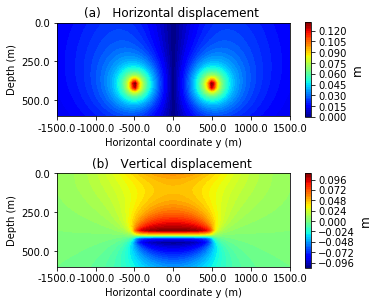

In [18]:
# Plot the displacement fields 
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(5.33,4.33))

ax[0].set_aspect("equal")
img = ax[0].contourf(y, z, displacement_horizontal.reshape(shape[::-1]), 
                  60, cmap="jet")
cb = plt.colorbar(img, ax=ax[0], aspect=15, pad=0.05, shrink=0.90)
cb.set_label('m', rotation=90, fontsize=12)
ax[0].set_title("(a)   Horizontal displacement ")

ax[0].set_xticklabels(ax[0].get_xticks())
ax[0].set_yticklabels(ax[0].get_yticks())
ax[0].invert_yaxis()
ax[0].set_xlabel("Horizontal coordinate y (m)")
ax[0].set_ylabel("Depth (m)")

ax[1].set_aspect("equal")
img = ax[1].contourf(y, z, displacement_z.reshape(shape[::-1]),  
                  60, cmap="jet")
cb = plt.colorbar(img, ax=ax[1], aspect=15, pad=0.05, shrink=0.90)
cb.set_label('m', rotation=90, fontsize=12)
ax[1].set_title("(b)   Vertical displacement ")

ax[1].set_xticklabels(ax[1].get_xticks())
ax[1].set_yticklabels(ax[1].get_yticks())
ax[1].invert_yaxis()
ax[1].set_xlabel("Horizontal coordinate y (m)")
ax[1].set_ylabel("Depth (m)")
plt.tight_layout(True)
plt.savefig('../manuscript/Fig/Figure_Displacement.png', dpi=600)

# Plot the displacement fields by using Geertsma's (1973) 

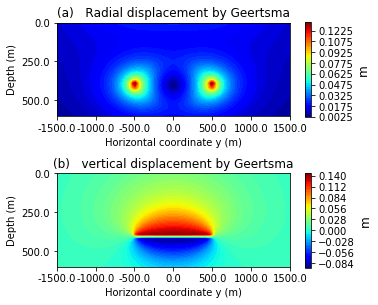

In [19]:
# Plot the displacement fields by Geertsma
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(5.33,4.33))

ax[0].set_aspect("equal")
img = ax[0].contourf(y, z, ur.reshape(shape[::-1]), 
                  60, cmap="jet")
cb = plt.colorbar(img, ax=ax[0], aspect=15, pad=0.05, shrink=0.90)
cb.set_label('m', rotation=90, fontsize=12)
ax[0].set_title("(a)   Radial displacement by Geertsma")

ax[0].set_xticklabels(ax[0].get_xticks())
ax[0].set_yticklabels(ax[0].get_yticks())
ax[0].invert_yaxis()
ax[0].set_xlabel("Horizontal coordinate y (m)")
ax[0].set_ylabel("Depth (m)")

ax[1].set_aspect("equal")
img = ax[1].contourf(y, z, uz.reshape(shape[::-1]),  
                  60, cmap="jet")
cb = plt.colorbar(img, ax=ax[1], aspect=15, pad=0.05, shrink=0.90)
cb.set_label('m', rotation=90, fontsize=12)
ax[1].set_title("(b)   vertical displacement by Geertsma")

ax[1].set_xticklabels(ax[1].get_xticks())
ax[1].set_yticklabels(ax[1].get_yticks())
ax[1].invert_yaxis()
ax[1].set_xlabel("Horizontal coordinate y (m)")
ax[1].set_ylabel("Depth (m)")
plt.tight_layout(True)
plt.savefig('../manuscript/Fig/Figure_Displacement_Geertsma.png', dpi=600)

## DISPLACEMENT FIELD BY OUR METHODOLOGY: 
### Reservoir under uniform depletion: (a) Horizontal x-component displacement and (b) vertical displacement by our methodology that uses the closed expressions of the volume integrations given by Nagy et al. (2000) and Nagy et al. (2002). These displacements are calculated along the x-axis, at $y = 0$ m and $z$ located at the depths of:  seafloor ($z = 0$ m), reservoir top ($z = 750$ m), reservoir center ($z = 800$ m) and reservoir bottom ($z = 850$ m).



In [20]:
# Define computation points
z_top = np.zeros(100) + 750
z_center = np.zeros(100) + 800
z_bottom = np.zeros(100) + 850
z_seafloor = np.zeros(100) 
x = np.linspace(0, 600, 100)
y = np.zeros_like(x)
coordinates_top = np.vstack([y, x, z_top])
coordinates_center = np.vstack([y, x, z_center])
coordinates_bottom = np.vstack([y, x, z_bottom])
coordinates_seafloor = np.vstack([y, x, z_seafloor])

### Compute the displacement components  along the x-axis, at $y = 0 $ m and $z$ located at the depths of:  seafloor ($z = 0$ m), reservoir top ($z = 750$ m), reservoir center ($z = 800$ m) and reservoir bottom ($z = 850$ m).

In [21]:
# Compute the x-component of displacement  at the top

d_x1_top, d_x2_top, d_xz2_top = cp.d_field_x_component(coordinates_top, model, DP, poisson, young)

displacement_x_top = d_x1_top + (3 - 4*poisson)*d_x2_top + d_xz2_top


# Compute the z-component of displacement  at the top

d_z1_top, d_z2_top, d_zz2_top = cp.d_field_z_component(coordinates_top, model, DP, poisson, young)

displacement_z_top = d_z1_top - (3 - 4*poisson)*d_z2_top + d_zz2_top

In [22]:
# Compute the x-component of displacement  at the center

d_x1_center, d_x2_center, d_xz2_center = cp.d_field_x_component(coordinates_center, model, DP, poisson, young)

displacement_x_center = d_x1_center + (3 - 4*poisson)*d_x2_center + d_xz2_center


# Compute the z-component of displacement  at the center

d_z1_center, d_z2_center, d_zz2_center = cp.d_field_z_component(coordinates_center, model, DP, poisson, young)

displacement_z_center = d_z1_center - (3 - 4*poisson)*d_z2_center + d_zz2_center

In [23]:
# Compute the x-component of displacement  at the bottom

d_x1_bottom, d_x2_bottom, d_xz2_bottom = cp.d_field_x_component(coordinates_bottom, model, DP, poisson, young)

displacement_x_bottom = d_x1_bottom + (3 - 4*poisson)*d_x2_bottom + d_xz2_bottom


# Compute the z-component of displacement  at the bottom

d_z1_bottom, d_z2_bottom, d_zz2_bottom = cp.d_field_z_component(coordinates_bottom, model, DP, poisson, young)

displacement_z_bottom = d_z1_bottom - (3 - 4*poisson)*d_z2_bottom + d_zz2_bottom

In [24]:
# Compute the x-component of displacement  at the seafloor
d_x1_seafloor, d_x2_seafloor, d_xz2_seafloor = cp.d_field_x_component(coordinates_seafloor, model, DP, poisson, young)

displacement_x_seafloor = d_x1_seafloor + (3 - 4*poisson)*d_x2_seafloor+ d_xz2_seafloor


# Compute the z-component of displacement  at the seafloor

d_z1_seafloor, d_z2_seafloor, d_zz2_seafloor = cp.d_field_z_component(coordinates_seafloor, model, DP, poisson, young)

displacement_z_seafloor = d_z1_seafloor - (3 - 4*poisson)*d_z2_seafloor + d_zz2_seafloor

### Plot the results at the top, center and bottom of the reservoir

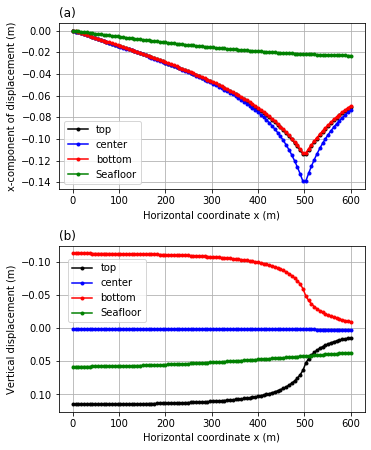

In [25]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(5.33, 6.33))

#fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(10,4))

ax[0].plot(x, displacement_x_top, 'k.-', label='top')
ax[0].plot(x, displacement_x_center, 'b.-', label='center')
ax[0].plot(x, displacement_x_bottom, 'r.-', label='bottom')
ax[0].plot(x, displacement_x_seafloor, 'g.-', label='Seafloor')
#ax[0].plot([-0.25, 0], [800, 800], 'k--')
#ax[0].set_xlim(-0.25, 0)
#ax[0].invert_yaxis()
ax[0].set_title('(a)', loc='left')
ax[0].set_xlabel("Horizontal coordinate x (m)") 
ax[0].set_ylabel("x-component of displacement (m)")
ax[0].grid()
ax[0].legend(loc='best')

ax[1].plot(x, displacement_z_top, 'k.-', label='top')
ax[1].plot(x, displacement_z_center, 'b.-', label='center')
ax[1].plot(x, displacement_z_bottom, 'r.-', label='bottom')
ax[1].plot(x, displacement_z_seafloor, 'g.-', label='Seafloor')
# ax[1].plot([-0.1, 0.1], [800, 800], 'k--')
# ax[1].plot([-0.1, 0.1], [900, 900], 'k--')
#ax[1].set_xlim(-0.1, 0.1)
ax[1].invert_yaxis()
ax[1].set_title('(b)', loc='left')
ax[1].set_xlabel("Horizontal coordinate x (m)") 
ax[1].set_ylabel("Vertical displacement (m)")
ax[1].grid()
ax[1].legend(loc='upper right', bbox_to_anchor=(0.3, 0.95))                                  
plt.tight_layout(True)
plt.savefig('../manuscript/Fig/Figure_Displacement_z_levels.png', dpi=600)

# DISPLACEMENT FIELD by using Geertsma's (1973) 

####  Vertical displacement using Geertsma’s (1973) method   considering an elastic homogeneous cylindrical reservoir under uniform depletion based on the nucleus-of-strain concept in the half-space (Mindlin and Cheng, 1950). The displacement is calculated along the x-axis, at $y = 0$ m and $z$ located at the depths of:  seafloor ($z = 0$ m), reservoir top ($z = 750$ m), and reservoir bottom ($z = 850$ m).

In [26]:

# Geertsman: Compute radial and vertical displacement at the top

ur_top, uz_top = ge.geertsma(coordinates_top, model_ge, DP, cm, poisson, R, h)


# Geertsman: Compute radial and vertical displacement at the bottom

ur_bottom, uz_bottom = ge.geertsma(coordinates_bottom, model_ge, DP, cm, poisson, R, h)

# Geertsman: Compute radial and vertical displacement at the seafloor

ur_seafloor, uz_seafloor = ge.geertsma(coordinates_seafloor, model_ge, DP, cm, poisson, R, h)





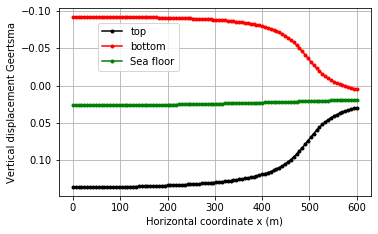

In [27]:
plt.figure(figsize=(5.33, 3.33))

plt.plot()

plt.plot(x, uz_top, 'k.-', label='top')
plt.plot(x, uz_bottom, 'r.-', label='bottom')
plt.plot(x, uz_seafloor, 'g.-', label='Sea floor')
plt.gca().invert_yaxis()
plt.xlabel("Horizontal coordinate x (m)") 
plt.ylabel("Vertical displacement Geertsma")
plt.grid()
plt.legend(loc='upper right', bbox_to_anchor=(0.4, 0.95))      
                 
plt.tight_layout(True)
plt.savefig('../manuscript/Fig/Figure_Displacement_z_levels_Geertsma.png', dpi=600)

### THE STRESS FIELD BY OUR METHODOLOGY on plane z = 0 m



In [28]:
# Define computation points on the plane z = 0m
shape = (60, 60)
y = np.linspace(-1500, 1500, shape[0])
x = np.linspace(-1500, 1500, shape[1])
y, x = np.meshgrid(y, x)
y = y.ravel()
x = x.ravel()
z = np.zeros_like(x) 
coordinates = np.vstack([y, x, z])

In [29]:
# Compute the x-component of stress

s_xz1, s_xz2, s_xzz2 = cp.s_field_x_component(coordinates, model, DP, poisson, young)

stress_x = s_xz1 + s_xzz2 + s_xz2
#stress_x *= -young/(1 + poisson)  # perguntar ao Vanderlei Por que do Negativo 
stress_x *= young/(1 + poisson)


# Compute the y-component of stress

s_yz1, s_yz2, s_yzz2  = cp.s_field_y_component(coordinates, model, DP, poisson, young)

stress_y = s_yz1 + s_yzz2 + s_yz2
#stress_y *= -young/(1 + poisson)  # perguntar ao Vanderlei Por que do Negativo 
stress_y *= young/(1 + poisson)


# Compute the z-component of stress
s_zz1, s_zz2, s_zzz2 = cp.s_field_z_component(coordinates, model, DP, poisson, young)

stress_z = s_zz1 + s_zzz2 - s_zz2
#stress_z *= -young/(1 + poisson)  # perguntar ao Vanderlei Por que do Negativo 
stress_z *= young/(1 + poisson)

In [30]:
# horizontal component of stress
stress_horizontal = np.sqrt(stress_x**2 + stress_y**2)

### Geertsma:  Compute the stress components on plane z = 0 m

In [31]:
# sr is the radial stress, st is the tangencial stress and sz is the vertical stress
sr, st, sz = ge.geertsma_stress(coordinates, model_ge, DP, cm, poisson, R, h, G)

### Plot the stress components on plane z = 0 m
### Reservoir under uniform depletion: (a) $x-$, (b) $y-$, and (c) $z-$ components of the stress at the free surface

In [32]:
y = np.linspace(-1500, 1500, shape[0])
x = np.linspace(-1500, 1500, shape[1])

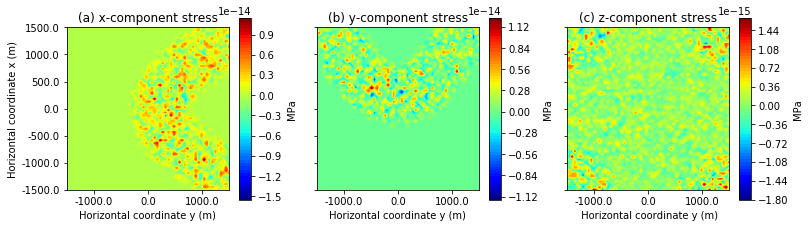

In [33]:
# Plot the results on a map
fig, ax = plt.subplots(nrows=1, ncols=3, sharex=False, sharey=True, figsize=(11.33, 5.33))

ax[0].set_aspect("equal")
img = ax[0].contourf(y, x, stress_x.reshape(shape), 
                  60, cmap="jet")

cb = plt.colorbar(img, ax=ax[0], aspect=15, pad=0.05, shrink=0.5)
cb.set_label('MPa', rotation=90, fontsize=10)

ax[0].set_title("(a) x-component stress")

ax[0].set_xticklabels(ax[0].get_xticks())
ax[0].set_yticklabels(ax[0].get_yticks())
ax[0].set_xlabel("Horizontal coordinate y (m)")
ax[0].set_ylabel("Horizontal coordinate x (m)")

ax[1].set_aspect("equal")
img = ax[1].contourf(y, x, stress_y.reshape(shape),  
                  60, cmap="jet")

cb = plt.colorbar(img, ax=ax[1], aspect=15, pad=0.05, shrink=0.5)
cb.set_label('MPa', rotation=90, fontsize=10)

ax[1].set_title("(b) y-component stress")

ax[1].set_xticklabels(ax[1].get_xticks())
ax[1].set_yticklabels(ax[1].get_yticks())
ax[1].set_xlabel("Horizontal coordinate y (m)")
#ax[1].set_ylabel("x (m)")

ax[2].set_aspect("equal")
img = ax[2].contourf(y, x, stress_z.reshape(shape),  
                  60, cmap="jet")
cb = plt.colorbar(img, ax=ax[2], aspect=15, pad=0.05, shrink=0.5)
cb.set_label('MPa', rotation=90, fontsize=10)

ax[2].set_title("(c) z-component stress")

ax[2].set_xticklabels(ax[2].get_xticks())
ax[2].set_yticklabels(ax[2].get_yticks())
ax[2].set_xlabel(" Horizontal coordinate y (m)")
#ax[2].set_ylabel("x (m)")

plt.tight_layout(True)
plt.savefig('../manuscript/Fig/Figure_Null_stress.png', dpi=600)